In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import math
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.decomposition import PCA
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Preprocessing
from sklearn.impute import SimpleImputer

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
# This is for regression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("Consumer goods.csv")

In [3]:
df.head()

,Year,Type,Product group,Producer,Code,Volume,Cost per unit,Price per unit,Revenues,Total Cost,Profit Percent,Summary Profits
0,2018,Convenience stores,Meat,J&F,|13/12/38|,420,6.00,8.40,"$3,542.00","$2,528.40",29,Good Profit
1,2018,Convenience stores,Meat,J&F,|13/13/98|,480,6.10,7.40,"$3,558.40","$2,947.20",17,Acceptable Profit
2,2018,Convenience stores,Meat,J&F,|13/13/99|,528,5.40,7.60,"$4,019.84","$2,837.12",29,Good Profit
3,2018,Convenience stores,Coffee,J&F,|13/01/01|,4836,0.74,0.96,"$4,642.56","$3,578.64",23,Good Profit
4,2018,Convenience stores,Coffee,J&F,|13/01/01a|,5928,0.95,0.99,"$5,868.72","$5,631.60",4,Acceptable Profit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15117 entries, 0 to 15116
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             15117 non-null  object 
 1   Type             15117 non-null  object 
 2   Product group    15117 non-null  object 
 3   Producer         15117 non-null  object 
 4   Code             15117 non-null  object 
 5   Volume           15117 non-null  int64  
 6   Cost per unit    15117 non-null  float64
 7   Price per unit   15117 non-null  float64
 8   Revenues         15117 non-null  object 
 9   Total Cost       15117 non-null  object 
 10  Profit Percent   15117 non-null  int64  
 11  Summary Profits  15116 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Volume,Cost per unit,Price per unit,Profit Percent
count,15117.000000,15117.000000,15117.000000,15117.000000
mean,1437.010518,2.393392,3.201063,23.881193
std,1984.730748,1.414972,1.897611,12.935923
min,48.000000,0.400000,0.900000,-31.000000
25%,396.000000,1.140000,1.330000,15.000000
50%,792.000000,2.360000,3.240000,23.000000
75%,1452.000000,2.910000,3.920000,33.000000
max,9600.000000,6.700000,8.700000,66.000000


In [6]:
df.describe(exclude='number')

,Year,Type,Product group,Producer,Code,Revenues,Total Cost,Summary Profits
count,15117,15117,15117,15117,15117,15117,15117,15116
unique,4,3,15,124,4033,8151,8133,3
top,2014 (6m),Convenience stores,Fresh salads,North Cascade,|32/01/21|,$395.12,$72.00,Good Profit
freq,4032,12051,2770,899,4,17,23,7276


In [7]:
df.isna().sum()

Year               0
Type               0
Product group      0
Producer           0
Code               0
Volume             0
Cost per unit      0
Price per unit     0
Revenues           0
Total Cost         0
Profit Percent     0
Summary Profits    1
dtype: int64

In [8]:
df['Summary Profits'].fillna(df['Summary Profits'].mode()[0], inplace = True)
df['Summary Profits'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
15112    False
15113    False
15114    False
15115    False
15116    False
Name: Summary Profits, Length: 15117, dtype: bool

In [9]:
df.isna().sum()

Year               0
Type               0
Product group      0
Producer           0
Code               0
Volume             0
Cost per unit      0
Price per unit     0
Revenues           0
Total Cost         0
Profit Percent     0
Summary Profits    0
dtype: int64

We are gonna drop unnessacary columns.

In [10]:
df=df.drop(['Year','Code'],axis=1)
df.head()

,Type,Product group,Producer,Volume,Cost per unit,Price per unit,Revenues,Total Cost,Profit Percent,Summary Profits
0,Convenience stores,Meat,J&F,420,6.00,8.40,"$3,542.00","$2,528.40",29,Good Profit
1,Convenience stores,Meat,J&F,480,6.10,7.40,"$3,558.40","$2,947.20",17,Acceptable Profit
2,Convenience stores,Meat,J&F,528,5.40,7.60,"$4,019.84","$2,837.12",29,Good Profit
3,Convenience stores,Coffee,J&F,4836,0.74,0.96,"$4,642.56","$3,578.64",23,Good Profit
4,Convenience stores,Coffee,J&F,5928,0.95,0.99,"$5,868.72","$5,631.60",4,Acceptable Profit


We are gonna convert the Total cost column and Revenues column to a float type.

In [11]:
df['Total Cost'] = df['Total Cost'].str.replace('$','')
df['Total Cost'] = df['Total Cost'].str.replace(',','')
df['Total Cost'] = df['Total Cost'].astype(float)

<ipython-input-11-c899c766a8e9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Total Cost'] = df['Total Cost'].str.replace('$','')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15117 entries, 0 to 15116
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             15117 non-null  object 
 1   Product group    15117 non-null  object 
 2   Producer         15117 non-null  object 
 3   Volume           15117 non-null  int64  
 4   Cost per unit    15117 non-null  float64
 5   Price per unit   15117 non-null  float64
 6   Revenues         15117 non-null  object 
 7   Total Cost       15117 non-null  float64
 8   Profit Percent   15117 non-null  int64  
 9   Summary Profits  15117 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 1.2+ MB


In [13]:
df['Revenues'] = df['Revenues'].str.replace('$','')
df['Revenues'] = df['Revenues'].str.replace(',','')
df['Revenues'] = df['Revenues'].astype(float)

<ipython-input-13-bedb2358a6d1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Revenues'] = df['Revenues'].str.replace('$','')


In [14]:
df.head()

,Type,Product group,Producer,Volume,Cost per unit,Price per unit,Revenues,Total Cost,Profit Percent,Summary Profits
0,Convenience stores,Meat,J&F,420,6.00,8.40,3542.00,2528.40,29,Good Profit
1,Convenience stores,Meat,J&F,480,6.10,7.40,3558.40,2947.20,17,Acceptable Profit
2,Convenience stores,Meat,J&F,528,5.40,7.60,4019.84,2837.12,29,Good Profit
3,Convenience stores,Coffee,J&F,4836,0.74,0.96,4642.56,3578.64,23,Good Profit
4,Convenience stores,Coffee,J&F,5928,0.95,0.99,5868.72,5631.60,4,Acceptable Profit


We are gonna start splitting the data into a training and test set 80,20 respectively.

In [15]:
# Splitting data

# Split into training and test sets
training, test = train_test_split(
    df, 
    train_size=0.8, # 80% of data to train
    test_size=0.2, # 20% of data to test
    random_state=42 # so that regardless of how many times I run the code I will have the "exact" points
)

We are gonna drop the null values in our sets.

In [16]:
training = training.dropna() 
training

,Type,Product group,Producer,Volume,Cost per unit,Price per unit,Revenues,Total Cost,Profit Percent,Summary Profits
4679,Convenience stores,Beverages,San Pellegrino,120,1.07,1.39,166.80,128.40,23,Good Profit
6634,Convenience stores,Fresh salads,Cibo italiano,816,2.25,3.43,2798.88,1836.00,34,Good Profit
9775,Convenience stores,Ice cream,Gelati veri,2040,2.76,3.44,7017.60,5630.40,20,Acceptable Profit
15050,Convenience stores,Homecare products,WC Net,588,1.87,2.40,1411.20,1099.56,22,Good Profit
8222,Convenience stores,Alcohol,North Cascade,1392,4.00,7.00,9744.00,5568.00,43,Excellent Profits
...,...,...,...,...,...,...,...,...,...,...
5191,Convenience stores,Delicatessen,The food world,492,4.03,5.79,2848.68,1982.76,30,Good Profit
13418,Convenience stores,Coffee,Caffe Italiano,5580,0.85,0.99,5524.20,4743.00,14,Acceptable Profit
5390,Convenience stores,Corn flakes,Chocopops,276,1.60,1.81,499.56,441.60,12,Acceptable Profit
860,Convenience stores,Meat,North Cascade,504,5.30,7.90,3984.96,2684.64,33,Good Profit


In [17]:
test= test.dropna()
test

,Type,Product group,Producer,Volume,Cost per unit,Price per unit,Revenues,Total Cost,Profit Percent,Summary Profits
6077,Hypermarkets,Bread products,J&F Bread,1416,0.71,0.94,1331.04,1005.36,24,Good Profit
7894,Convenience stores,Fresh salads,Bonduelle,612,2.65,3.76,2301.12,1621.80,30,Good Profit
6820,Convenience stores,Delicatessen,Wild West,456,4.22,6.45,2941.20,1924.32,35,Good Profit
1593,Convenience stores,Meat,Delta,540,5.90,8.60,4633.20,3182.40,31,Good Profit
10717,Convenience stores,Fresh salads,Cibo italiano,852,2.42,3.29,2803.08,2061.84,26,Good Profit
...,...,...,...,...,...,...,...,...,...,...
11600,Convenience stores,Cosmetics,Genco,540,4.05,5.40,2916.00,2187.00,25,Good Profit
13689,Convenience stores,Delicatessen,St.Dalfour,432,4.77,5.15,2224.80,2060.64,7,Acceptable Profit
2347,Hypermarkets,Sauces,Barilla,144,2.60,3.00,425.28,372.48,12,Acceptable Profit
13349,Convenience stores,Sweets,Chocowaff,996,1.19,1.67,1663.32,1185.24,29,Good Profit


We are gonna start encoding our columns.

In [18]:
# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ["Type", "Product group","Producer"]

# One Hot encode the column in both the train and validation sets
one_hot_df = one_hot.fit_transform(training[col_names]).toarray()

one_hot_df_val = one_hot.transform(test[col_names]).toarray()

In [19]:
# Look at the categories
one_hot.categories_

[array(['Convenience stores', 'Hypermarkets', 'Supermarkets'], dtype=object),
 array(['Alcohol', 'Beverages', 'Bread products', 'Cheese products',
        'Coffee', 'Corn flakes', 'Cosmetics', 'Delicatessen',
        'Fresh salads', 'Homecare products', 'Ice cream', 'Meat', 'Sauces',
        'Sweets', 'Vegetables'], dtype=object),
 array(['Aqua', 'Atkins', 'Barilla', 'Bavarian specialties', 'Bayer',
        'Beiersdorf', "Bella's", 'Bonduelle', 'Brembo', 'Buonissimi',
        'C&C vegetables', 'Caffe Italiano', 'Campari', 'Capy',
        'Cherry dreams', 'Chocopops', 'Chocowaff', 'Cibo italiano', 'Cif',
        'Cioccolatti Italiani', 'Cirio', 'Corny', 'Corosina',
        'Creamy treat', 'Danone', 'De Cecco', 'Delta', 'Dole', 'Doleo',
        'Dr Pepper', 'Earthbound', 'Famous Grousse', 'Fast&Easy',
        'Ferrero', 'Fresh express', 'Freshco', 'Garofalo',
        'Gelati e altro', 'Gelati italiani', 'Gelati veri', 'Genco',
        'Grana Padano', 'Green Farm', 'Green lamb', 'Green st

In [20]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

['Type_Convenience stores',
 'Type_Hypermarkets',
 'Type_Supermarkets',
 'Product group_Alcohol',
 'Product group_Beverages',
 'Product group_Bread products',
 'Product group_Cheese products',
 'Product group_Coffee',
 'Product group_Corn flakes',
 'Product group_Cosmetics',
 'Product group_Delicatessen',
 'Product group_Fresh salads',
 'Product group_Homecare products',
 'Product group_Ice cream',
 'Product group_Meat',
 'Product group_Sauces',
 'Product group_Sweets',
 'Product group_Vegetables',
 'Producer_Aqua',
 'Producer_Atkins',
 'Producer_Barilla',
 'Producer_Bavarian specialties',
 'Producer_Bayer',
 'Producer_Beiersdorf',
 "Producer_Bella's",
 'Producer_Bonduelle',
 'Producer_Brembo',
 'Producer_Buonissimi',
 'Producer_C&C vegetables',
 'Producer_Caffe Italiano',
 'Producer_Campari',
 'Producer_Capy',
 'Producer_Cherry dreams',
 'Producer_Chocopops',
 'Producer_Chocowaff',
 'Producer_Cibo italiano',
 'Producer_Cif',
 'Producer_Cioccolatti Italiani',
 'Producer_Cirio',
 'Produ

In [21]:
oh_df = pd.DataFrame(
    one_hot_df,
    index=training.index,
    columns = column_names
)

oh_df_val = pd.DataFrame(
    one_hot_df_val,
    index=test.index,
    columns = column_names
)

print(oh_df.shape)
print(oh_df_val.shape)

(12093, 142)
(3024, 142)


In [22]:
# Create train_new df by merging train and one hot encoded df together and drop color and clarity cols

training = training.merge(oh_df, on=training.index).set_index("key_0").drop(["Type", "Product group","Producer"], axis=1)
test = test.merge(oh_df_val, on=test.index).set_index("key_0").drop(["Type", "Product group","Producer"], axis=1)

print(training.shape)
print(test.shape)

(12093, 149)
(3024, 149)


We are creating the feature set and the traget set for both the training and the validation

In [23]:
target = "Summary Profits"

X_train = training.drop(target, axis=1)
y_train = training[target]

X_test = test.drop(target, axis=1)
y_test = test[target]

Starting first with Logistic regression

In [24]:
classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
test_dataset = pd.DataFrame(X_test, columns= ['ProfitSummary'])

test_dataset['Actual_profit'] = y_test.to_numpy()
test_dataset['Predict_profit'] = y_pred

test_dataset

,ProfitSummary,Actual_profit,Predict_profit
key_0,,,
6077,NaN,Good Profit,Good Profit
7894,NaN,Good Profit,Good Profit
6820,NaN,Good Profit,Good Profit
1593,NaN,Good Profit,Good Profit
10717,NaN,Good Profit,Good Profit
...,...,...,...
11600,NaN,Good Profit,Good Profit
13689,NaN,Acceptable Profit,Acceptable Profit
2347,NaN,Acceptable Profit,Acceptable Profit


In [27]:
# Counting the records when the actual and the predicitons are the same

(test_dataset['Actual_profit'] == test_dataset['Predict_profit']).value_counts()

True     3018
False       6
dtype: int64

In [28]:
accuracy_score(test_dataset['Actual_profit'],test_dataset['Predict_profit'],normalize=True)

0.998015873015873

In [29]:
# Note: This is a link for more details on the confusion matrix in scikit-learn

cm = confusion_matrix(y_test, y_pred)
cm

array([[1258,    0,    0],
       [   0,  324,    6],
       [   0,    0, 1436]], dtype=int64)

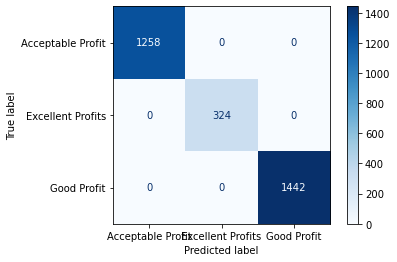

In [30]:
plot_confusion_matrix(classifier, X=X_test, y_true=y_pred, cmap='Blues')

Tuning our logistic regression model using PCA.

In [31]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X_train)

In [32]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

In [33]:
pd.Series(pca.explained_variance_ratio_) 

0      3.555158e-02
1      2.841691e-02
2      2.246214e-02
3      2.125147e-02
4      1.628023e-02
           ...     
143    1.642257e-33
144    3.049135e-34
145    1.631868e-34
146    7.590205e-35
147    2.805512e-35
Length: 148, dtype: float64

In [34]:
pipe = make_pipeline(
    PCA(n_components= 9),
    LogisticRegression()
)

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8578042328042328

In [35]:
pred = pipe.predict(X_test)
print(classification_report(y_test, pred))

                   precision    recall  f1-score   support

Acceptable Profit       0.84      1.00      0.91      1258
Excellent Profits       0.77      0.59      0.67       330
      Good Profit       0.89      0.80      0.84      1436

         accuracy                           0.86      3024
        macro avg       0.83      0.79      0.81      3024
     weighted avg       0.86      0.86      0.85      3024



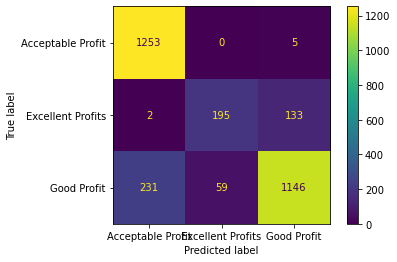

In [36]:
plot_confusion_matrix(pipe, X_test, y_test)
plt.grid(False);

Starting with descion tree next.

In [37]:
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [38]:
class_tree = DecisionTreeClassifier(criterion='gini', max_depth=4)
class_tree.fit(X_train_sc, y_train)
preds_class = class_tree.predict(X_test_sc)

In [39]:
val_train = round(class_tree.score(X_train_sc, y_train),2)*100
val_test = round(class_tree.score(X_test_sc, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 98.0%
Test Set Accuracy: 98.0%


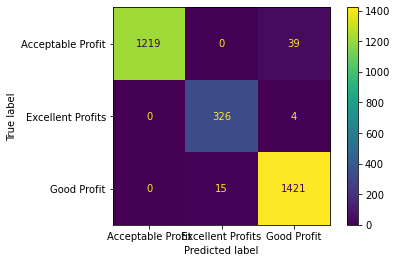

In [40]:
plot_confusion_matrix(class_tree, X_test_sc, y_test);

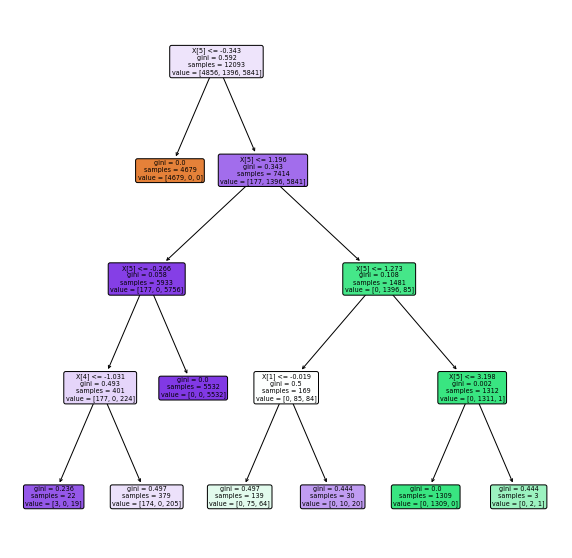

In [41]:
plt.figure(figsize=(10,10))

tree.plot_tree(
    class_tree, 
    filled=True,
    rounded=True,
);

Tuning our decision tree using Grid search.

In [42]:
# Classification
param_grid = {
    "criterion": ["gini", "entropy"], 
    "max_depth": [2,4,6]
}
grid = GridSearchCV(
    class_tree,
    param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6]},
             verbose=1)

In [43]:
grid.best_score_

0.9783343608344609

In [44]:
# Note: we only choose one possibility --> the one happens first 
grid.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [45]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2)

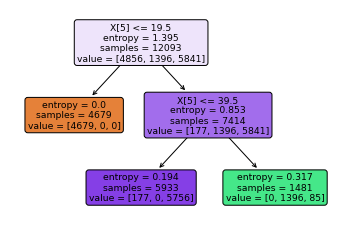

In [46]:
tree.plot_tree(
    grid.best_estimator_, # Access each individual estimator
    filled=True,
    rounded=True,
    )
plt.show()

Next is random forset classifier.

In [47]:
class_forest = RandomForestClassifier(n_estimators = 6, criterion = 'gini', random_state = 0)
class_forest.fit(X_train_sc, y_train)
preds_class = class_forest.predict(X_test_sc)

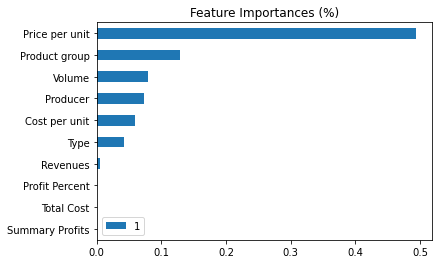

In [48]:
pd.DataFrame(dict(zip(df.columns, class_forest.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)");

In [49]:
val_train = round(class_forest.score(X_train_sc, y_train),2)*100
val_test = round(class_forest.score(X_test_sc, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 100.0%
Test Set Accuracy: 98.0%


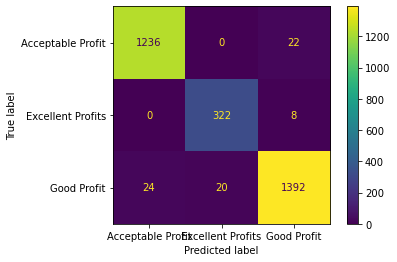

In [50]:
plot_confusion_matrix( class_forest,X_test_sc, y_test);

Tuning the Random forest model.

In [51]:
# Classification
param_grid = {
    "n_estimators": [10,20,30], 
    "criterion": ["gini", "entropy"], 
    "max_depth": [2,4,6] 
}
grid = GridSearchCV(
    class_forest,
    param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=6, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6], 'n_estimators': [10, 20, 30]},
             verbose=1)

In [52]:
grid.best_score_

0.8997778135665027

In [53]:
# Note: we only choose one possibility --> the one happens first 
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 10}

In [54]:
grid.best_estimator_.estimators_

[DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto',
                        random_state=209652396),
 DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto',
                        random_state=398764591),
 DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto',
                        random_state=924231285),
 DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto',
                        random_state=441365315),
 DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto',
                        random_state=1537364731),
 DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto',
                        random_state=192771779),
 DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto',
                       

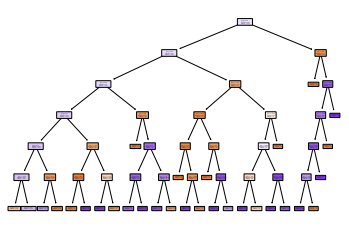

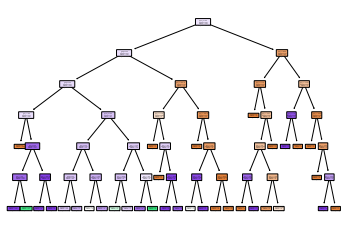

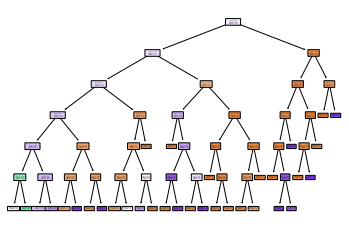

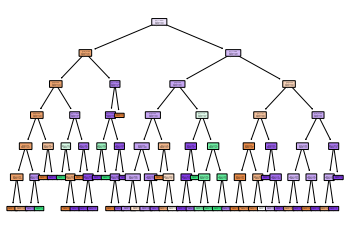

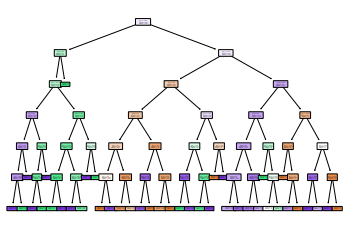

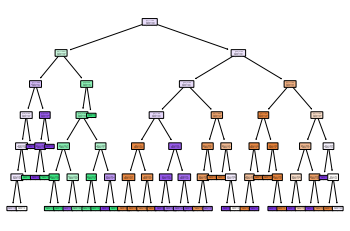

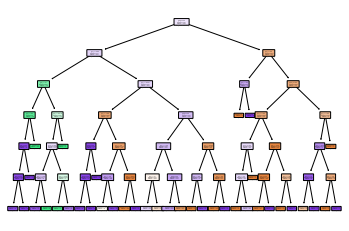

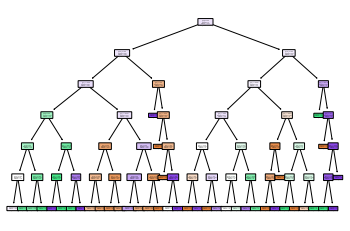

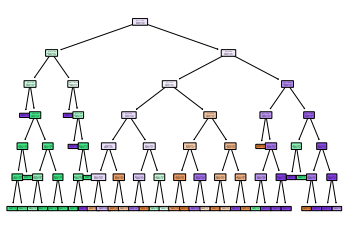

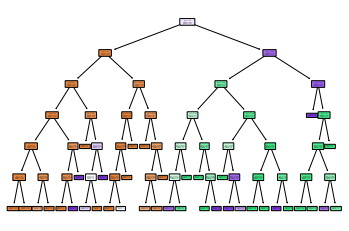

In [55]:
for x in range(len(grid.best_estimator_.estimators_)):
    tree.plot_tree(
    grid.best_estimator_.estimators_[x], # Access each individual estimator
    filled=True,
    rounded=True,
    )
    plt.show()

Using support vector machines model.

In [56]:
class_sv = SVC(kernel = 'linear', random_state = 0)

class_sv.fit(X_train_sc, y_train)
preds_class = class_sv.predict(X_test_sc)

In [57]:
val_train = round(class_sv.score(X_train_sc, y_train),2)*100
val_test = round(class_sv.score(X_test_sc, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 99.0%
Test Set Accuracy: 99.0%


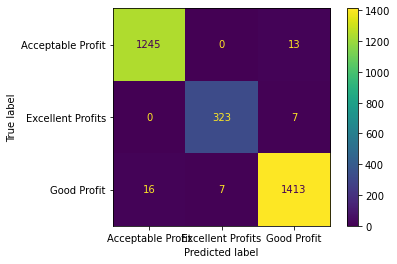

In [58]:
plot_confusion_matrix(class_sv, X_test_sc, y_test);

In [63]:
scores = cross_validate(class_sv, X_train_sc, y_train,scoring='accuracy')
scores

{'fit_time': array([1.31352401, 1.35836458, 1.29852867, 1.24067974, 1.26557517]),
 'score_time': array([0.11768651, 0.13064504, 0.11365962, 0.11971259, 0.11569238]),
 'test_score': array([0.98387764, 0.98759818, 0.98263745, 0.9751861 , 0.97766749])}

In [64]:
param_grid = {'C': [0.1,1], 'gamma': [1,0.1],'kernel': ['poly', 'sigmoid']}
grid = GridSearchCV(
    class_sv,
    param_grid,
    refit=True,
    verbose=2)
grid.fit(X_train_sc,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   9.5s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   8.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   9.8s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   9.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   9.6s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   3.6s
[CV] END ......................C=0.1, gamma=0.1, 

GridSearchCV(estimator=SVC(kernel='linear', random_state=0),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1],
                         'kernel': ['poly', 'sigmoid']},
             verbose=2)

In [65]:
grid.best_estimator_

SVC(C=1, gamma=1, kernel='poly', random_state=0)

In [66]:
grid.best_score_

0.9692380865432912

Seeing all our confusion matrix for all our plots without tuning.

Text(0.5, 1.0, 'Support Vector Classifier Results')

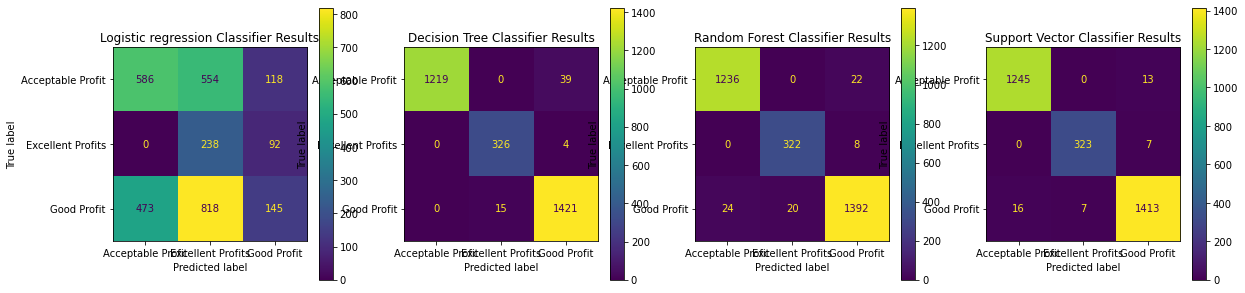

In [60]:
f, axes = plt.subplots(1, 4, figsize=(20, 5))
disp_reg = plot_confusion_matrix(classifier, X_test_sc, y_test, ax= axes[0])
disp_reg.ax_.set_title('Logistic regression Classifier Results')

disp_tree = plot_confusion_matrix(class_tree, X_test_sc, y_test, ax= axes[1])
disp_tree.ax_.set_title('Decision Tree Classifier Results')

disp_forest = plot_confusion_matrix(class_forest, X_test_sc, y_test, ax= axes[2])
disp_forest.ax_.set_title('Random Forest Classifier Results')

disp_sv = plot_confusion_matrix(class_sv, X_test_sc, y_test, ax= axes[3])
disp_sv.ax_.set_title('Support Vector Classifier Results')

### we decided to go with decision tree model

In [61]:
pipe = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(criterion='entropy', max_depth=2)
)

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9811507936507936